<a href="https://colab.research.google.com/github/noralizaaa/Case-Based-Reasoning-untuk-Klasifikasi-dan-Retrieval-Kasus-Narkotika/blob/main/Pelatihan_dan_Evaluasi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = "/content/DATASET.zip"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzip selesai. File tersimpan di:", extract_path)

Unzip selesai. File tersimpan di: /content/dataset


In [2]:
!pip install tensorflow numpy matplotlib seaborn scikit-learn

# **NonPretrained - Convolutional Neural Network (CNN)**

--- Memuat Data ---
Found 350 images belonging to 5 classes.
Found 100 images belonging to 5 classes.

DATASET INFORMATION
Train samples: 350
Test samples: 100
Batch size: 16
Steps per epoch: 22
Classes: ['Batik Poleng', 'Batik Kawung', 'Batik Parang', 'Batik Megamendung', 'Batik Dayak']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 424,389 (1.62 MB)

 Trainable params: 423,173 (1.61 MB)

 Non-trainable params: 1,216 (4.75 KB)


MULAI TRAINING


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
 22/200 ━━━━━━━━━━━━━━━━━━━━ 1:14 419ms/step - accuracy: 0.3066 - loss: 1.9787

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.3287 - loss: 1.8474 - val_accuracy: 0.2700 - val_loss: 1.6105 - learning_rate: 0.0100
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3881 - loss: 1.5985 - val_accuracy: 0.2800 - val_loss: 1.5398 - learning_rate: 0.0100
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4317 - loss: 1.4751 - val_accuracy: 0.1300 - val_loss: 1.6421 - learning_rate: 0.0100
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4125 - loss: 1.4892 - val_accuracy: 0.2100 - val_loss: 1.7551 - learning_rate: 0.0100
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4232 - loss: 1.3923 - val_accuracy: 0.2300 - val_loss: 1.6194 - learning_rate: 0.0100
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4527 - loss: 1.3280 - val_accuracy: 0.1700 - val_loss: 1.7570 - learning_rate: 0.0100
Epoch 7/40
 22/200 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5084 - loss: 1.1955
Epoc

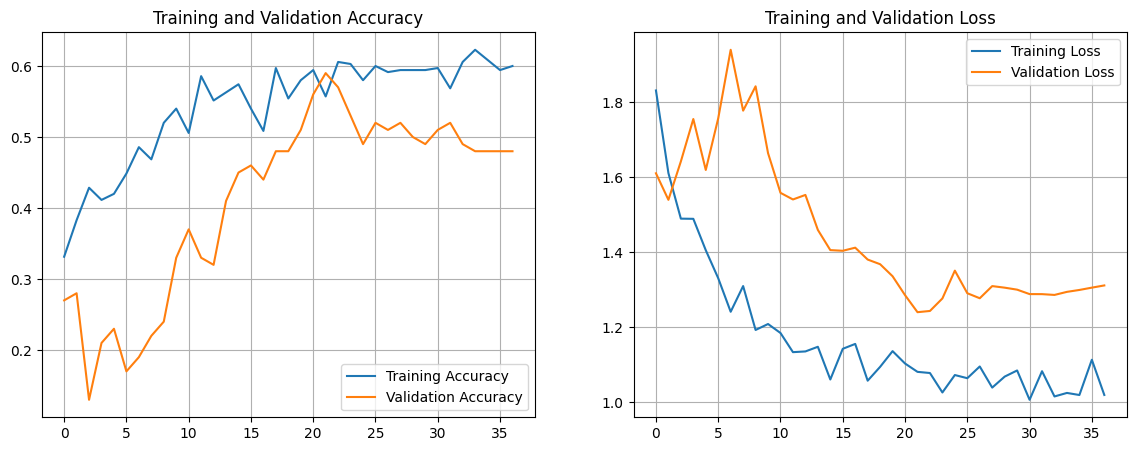

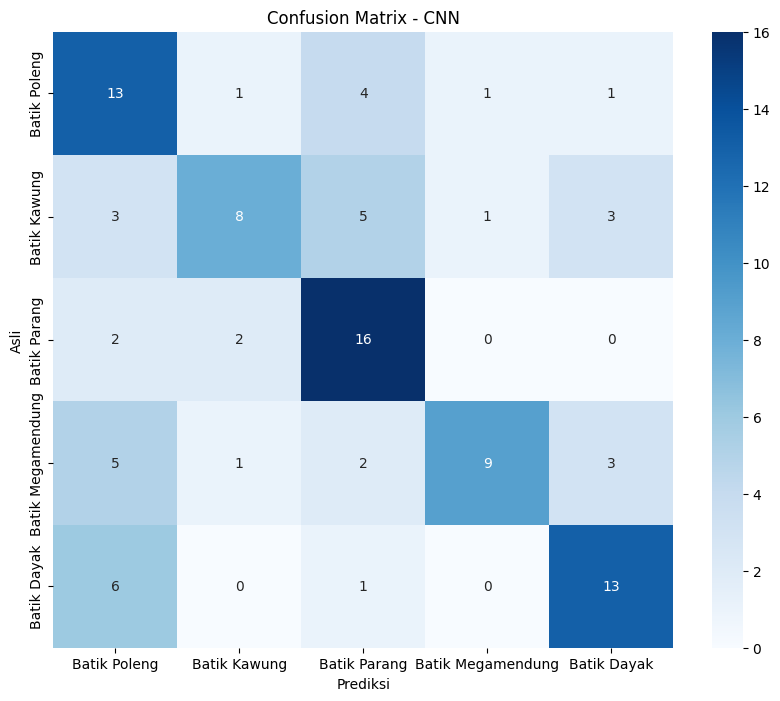

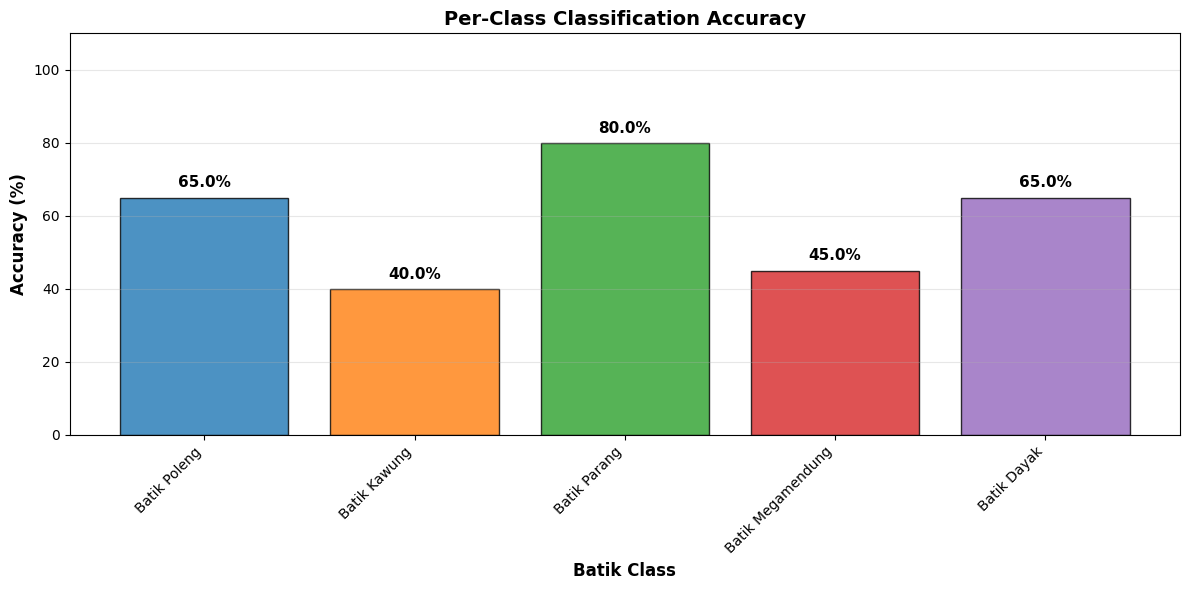


--- Menampilkan Contoh Hasil Prediksi ---
Found 100 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


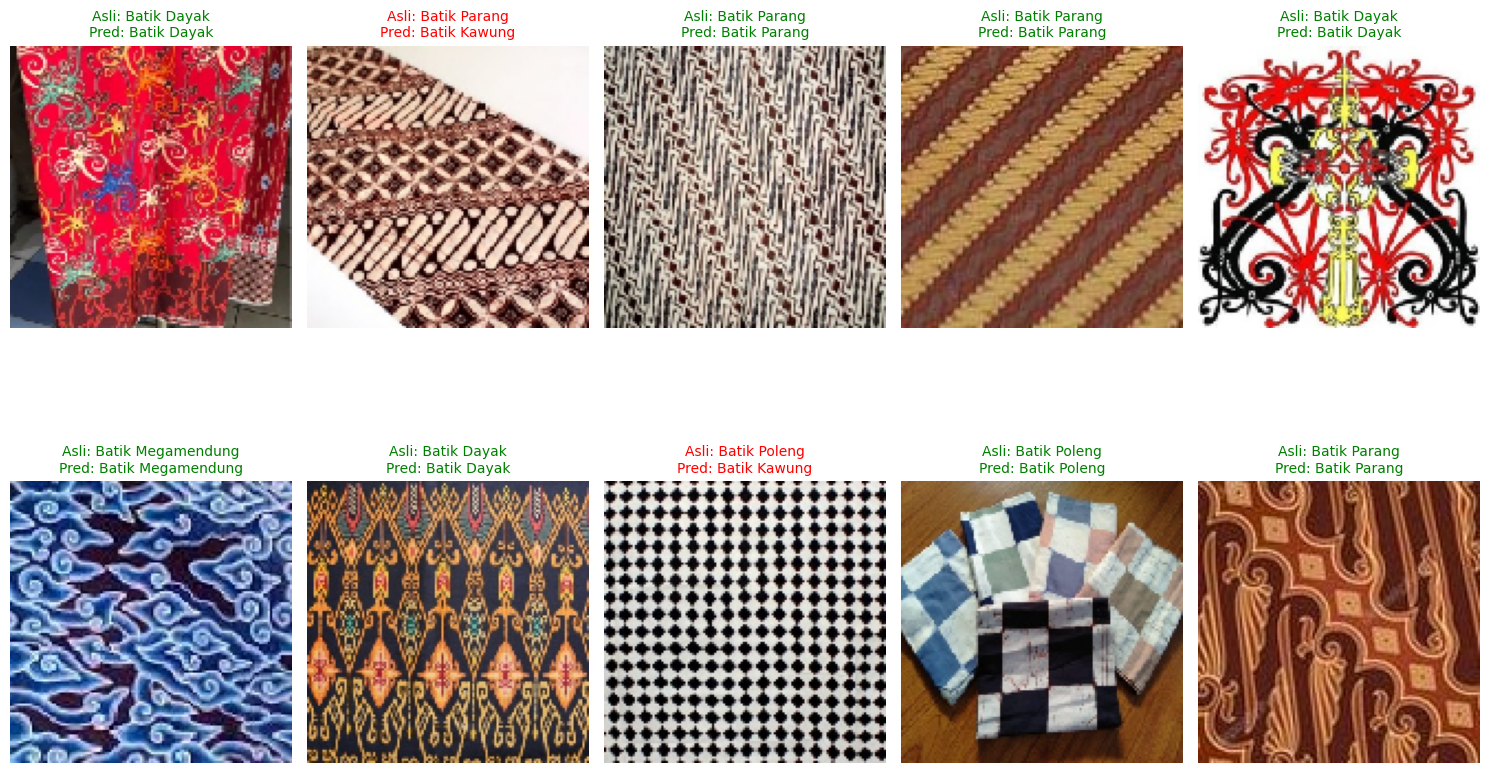


MENYIMPAN MODEL & METADATA
✅ Model berhasil disimpan: model_batik_cnn.h5
✅ Metadata berhasil disimpan: cnn_batik.pkl

TRAINING SUMMARY
Total Epochs: 37
Final Test Accuracy: 59.00%
Best Val Accuracy: 59.00% (Epoch 22)

Per-Class Accuracy:
  Batik Poleng        : 65.00%
  Batik Kawung        : 40.00%
  Batik Parang        : 80.00%
  Batik Megamendung   : 45.00%
  Batik Dayak         : 65.00%

Sedang mengunduh file ke komputer Anda...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 Download berhasil!


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pickle
from google.colab import files


# ==========================================
# 1. SETUP DATA
# ==========================================
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

base_dir = '/content/dataset/DATASET'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

selected_classes = [
    'Batik Poleng',
    'Batik Kawung',
    'Batik Parang',
    'Batik Megamendung',
    'Batik Dayak'
]

# Augmentasi Data (UPDATED - Lebih Agresif)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,              # ↑ Naikkan dari 15
    width_shift_range=0.2,          # ↑ Naikkan dari 0.1
    height_shift_range=0.2,         # ↑ Naikkan dari 0.1
    shear_range=0.15,               # ↑ Naikkan dari 0.1
    zoom_range=0.2,                 # ↑ Naikkan dari 0.1
    horizontal_flip=True,
    brightness_range=[0.85, 1.15],  # ✅ TAMBAHKAN (penting!)
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

print("--- Memuat Data ---")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

# Print dataset info
print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Train samples: {train_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_generator)}")
print(f"Classes: {selected_classes}")
print("="*60)


# ==========================================
# 2. MODEL "COMPACT LEAKY-GAP"
# ==========================================
model = Sequential([
    # Blok 1
    Conv2D(32, (3,3), padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),

    # Blok 2
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    Dropout(0.2),

    # Blok 3
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    Dropout(0.3),

    # Blok 4
    Conv2D(256, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    Dropout(0.3),

    # GAP Layer (Kunci Anti-Overfitting)
    GlobalAveragePooling2D(),

    # Dense Layer
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(5, activation='softmax')
])

# OPTIMIZER SGD
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()


# ==========================================
# 3. TRAINING
# ==========================================
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

print("\n" + "="*60)
print("MULAI TRAINING")
print("="*60)

history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=40,
    validation_data=test_generator,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)


# ==========================================
# 4. EVALUASI LENGKAP (UPDATED)
# ==========================================
print("\n" + "="*60)
print("EVALUASI MODEL")
print("="*60)

# Evaluate final metrics
final_loss, final_accuracy = model.evaluate(test_generator, verbose=0)
print(f"📉 Final Loss: {final_loss:.4f}")
print(f"📈 Final Accuracy: {final_accuracy * 100:.2f}%")

# Get predictions
print("\n🔮 Melakukan prediksi pada test set...")
test_generator.reset()
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("\n📊 CONFUSION MATRIX:")
print(cm)

# Classification Report
class_report_text = classification_report(y_true, y_pred, target_names=selected_classes, digits=4)
print("\n📊 CLASSIFICATION REPORT:")
print(class_report_text)

# Per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=range(len(selected_classes))
)
per_class_acc = cm.diagonal() / cm.sum(axis=1) * 100

# Macro & Weighted averages
macro_precision = precision.mean()
macro_recall = recall.mean()
macro_f1 = f1.mean()
macro_accuracy = per_class_acc.mean()

weighted_precision = (precision * support).sum() / support.sum()
weighted_recall = (recall * support).sum() / support.sum()
weighted_f1 = (f1 * support).sum() / support.sum()

# Best validation accuracy
best_val_acc = max(history.history['val_accuracy'])
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1

print(f"\n🎯 Best Validation Accuracy: {best_val_acc*100:.2f}% (Epoch {best_val_acc_epoch})")
print(f"📊 Macro Avg - Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1: {macro_f1:.4f}")
print(f"📊 Weighted Avg - Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1: {weighted_f1:.4f}")

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix - CNN')
plt.show()

# Per-class accuracy bar chart
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = plt.bar(range(len(selected_classes)), per_class_acc, color=colors, alpha=0.8, edgecolor='black')

for i, (bar, acc_val) in enumerate(zip(bars, per_class_acc)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{acc_val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Batik Class', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Per-Class Classification Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(len(selected_classes)), selected_classes, rotation=45, ha='right')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ==========================================
# 5. VISUALISASI PREDIKSI
# ==========================================
def visualize_predictions(generator, model, class_labels, num_images=10):
    temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=num_images,
        classes=selected_classes,
        class_mode='categorical',
        shuffle=True
    )

    images, labels = next(temp_gen)
    preds = model.predict(images)
    pred_indices = np.argmax(preds, axis=1)
    true_indices = np.argmax(labels, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])

        true_label = class_labels[true_indices[i]]
        pred_label = class_labels[pred_indices[i]]

        color = 'green' if true_indices[i] == pred_indices[i] else 'red'

        plt.title(f"Asli: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\n--- Menampilkan Contoh Hasil Prediksi ---")
visualize_predictions(test_generator, model, selected_classes, num_images=10)


# ==========================================
# 6. PENYIMPANAN MODEL & METADATA LENGKAP
# ==========================================
print("\n" + "="*60)
print("MENYIMPAN MODEL & METADATA")
print("="*60)

# 1. Simpan Model
model_filename = 'model_batik_cnn.h5'
model.save(model_filename)
print(f"✅ Model berhasil disimpan: {model_filename}")

# 2. Simpan Metadata LENGKAP
metadata_dashboard = {
    # ===== TRAINING HISTORY =====
    'history': history.history,
    'total_epochs': len(history.history['loss']),

    # ===== FINAL METRICS =====
    'final_accuracy': float(final_accuracy),
    'final_loss': float(final_loss),
    'best_val_accuracy': float(best_val_acc),
    'best_val_accuracy_epoch': int(best_val_acc_epoch),

    # ===== CLASS INFO =====
    'class_names': selected_classes,
    'class_indices': train_generator.class_indices,
    'num_classes': len(selected_classes),

    # ===== PREDICTIONS =====
    'y_true': y_true.tolist(),
    'y_pred': y_pred.tolist(),
    'predictions_proba': Y_pred.tolist(),

    # ===== CONFUSION MATRIX (PENTING!) =====
    'confusion_matrix': cm.tolist(),
    'confusion_matrix_normalized': (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).tolist(),

    # ===== PER-CLASS METRICS =====
    'per_class_accuracy': per_class_acc.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'f1_score': f1.tolist(),
    'support': support.tolist(),

    # ===== AGGREGATE METRICS =====
    'macro_avg': {
        'precision': float(macro_precision),
        'recall': float(macro_recall),
        'f1_score': float(macro_f1),
        'accuracy': float(macro_accuracy)
    },
    'weighted_avg': {
        'precision': float(weighted_precision),
        'recall': float(weighted_recall),
        'f1_score': float(weighted_f1)
    },

    # ===== TRAINING CONFIG =====
    'training_config': {
        'img_size': IMG_SIZE,
        'batch_size': BATCH_SIZE,
        'model_type': 'CNN',
        'optimizer': 'SGD',
        'learning_rate': 0.01,
        'momentum': 0.9,
        'nesterov': True,
        'augmentation': 'moderate',
        'steps_per_epoch': 200
    },

    # ===== CLASSIFICATION REPORT TEXT =====
    'classification_report_text': class_report_text,

    # ===== DATASET INFO =====
    'dataset_info': {
        'train_samples': train_generator.samples,
        'test_samples': test_generator.samples,
        'train_dir': train_dir,
        'test_dir': test_dir
    }
}

pkl_filename = 'cnn_batik.pkl'
with open(pkl_filename, 'wb') as f:
    pickle.dump(metadata_dashboard, f)
print(f"✅ Metadata berhasil disimpan: {pkl_filename}")

# 3. Print Summary
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs: {len(history.history['loss'])}")
print(f"Final Test Accuracy: {final_accuracy*100:.2f}%")
print(f"Best Val Accuracy: {best_val_acc*100:.2f}% (Epoch {best_val_acc_epoch})")
print(f"\nPer-Class Accuracy:")
for cls, acc_val in zip(selected_classes, per_class_acc):
    print(f"  {cls:20s}: {acc_val:5.2f}%")
print("="*60)

# 4. Download files
try:
    print("\nSedang mengunduh file ke komputer Anda...")
    files.download(model_filename)
    files.download(pkl_filename)
    print("🎉 Download berhasil!")
except Exception as e:
    print(f"⚠️ Gagal download otomatis: {e}")
    print(f"File tersimpan di folder: {os.getcwd()}")


# **PreTrained - MobileNetV2**

--- Memuat Data Training ---
Found 350 images belonging to 5 classes.

--- Memuat Data Testing ---
Found 100 images belonging to 5 classes.

DATASET INFORMATION
Train samples: 350
Test samples: 100
Batch size: 32
Steps per epoch: 11
Classes: ['Batik Poleng', 'Batik Kawung', 'Batik Parang', 'Batik Megamendung', 'Batik Dayak']

BUILDING MODEL


/tmp/ipython-input-3929758514.py:94: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV2_Batik"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,109 (9.24 MB)

 Trainable params: 164,869 (644.02 KB)

 Non-trainable params: 2,258,240 (8.61 MB)


MULAI TRAINING


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.1892 - loss: 2.7184 - val_accuracy: 0.2700 - val_loss: 1.5715 - learning_rate: 1.0000e-04
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - accuracy: 0.3190 - loss: 2.0134 - val_accuracy: 0.4400 - val_loss: 1.3475 - learning_rate: 1.0000e-04
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 556ms/step - accuracy: 0.3122 - loss: 2.1118 - val_accuracy: 0.5500 - val_loss: 1.1537 - learning_rate: 1.0000e-04
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.5128 - loss: 1.3659 - val_accuracy: 0.6600 - val_loss: 0.9981 - learning_rate: 1.0000e-04
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 550ms/step - accuracy: 0.5459 - loss: 1.3044 - val_accuracy: 0.7400 - val_loss: 0.8788 - learning_rate: 1.0000e-04
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.5103 - loss: 1.2759 - val_accuracy: 0.7800 - val_loss: 0.7866 - learning_rate: 1.0000e-04
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 537ms/step - accuracy: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

📊 CONFUSION MATRIX:
[[20  0  0  0  0]
 [ 1 17  0  1  1]
 [ 1  3 14  1  1]
 [ 0  0  0 18  2]
 [ 0  2  0  0 18]]

📊 CLASSIFICATION REPORT:
                   precision    recall  f1-score   support

     Batik Poleng     0.9091    1.0000    0.9524        20
     Batik Kawung     0.7727    0.8500    0.8095        20
     Batik Parang     1.0000    0.7000    0.8235        20
Batik Megamendung     0.9000    0.9000    0.9000        20
      Batik Dayak     0.8182    0.9000    0.8571        20

         accuracy                         0.8700       100
        macro avg     0.8800    0.8700    0.8685       100
     weighted avg     0.8800    0.8700    0.8685       100


🎯 Best Validation Accuracy: 87.00% (Epoch 12)
📊 Macro Avg - Precision: 0.8800, Recall: 0.8700, F1: 0.8685
📊 Weighted Avg - Precision: 0.8800, Recall: 0.8700, F1: 0.8685


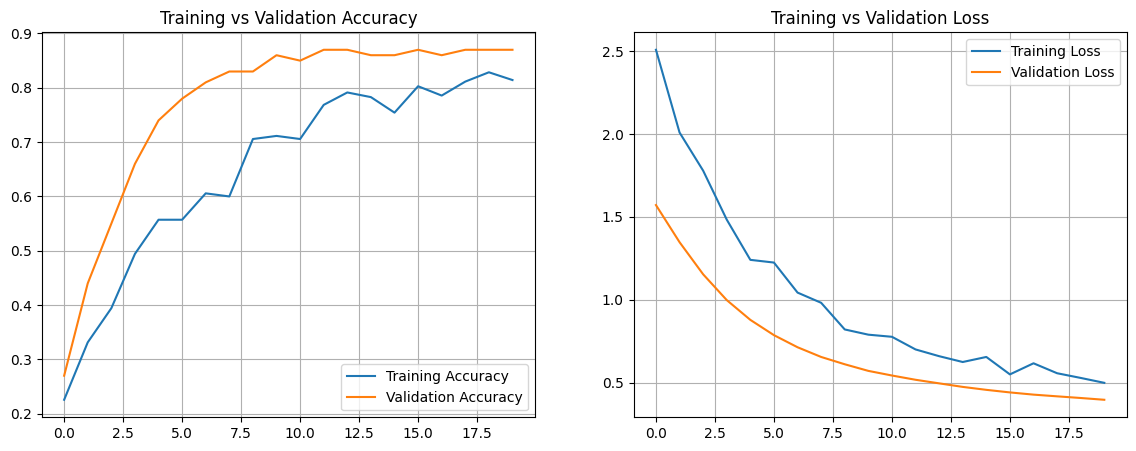

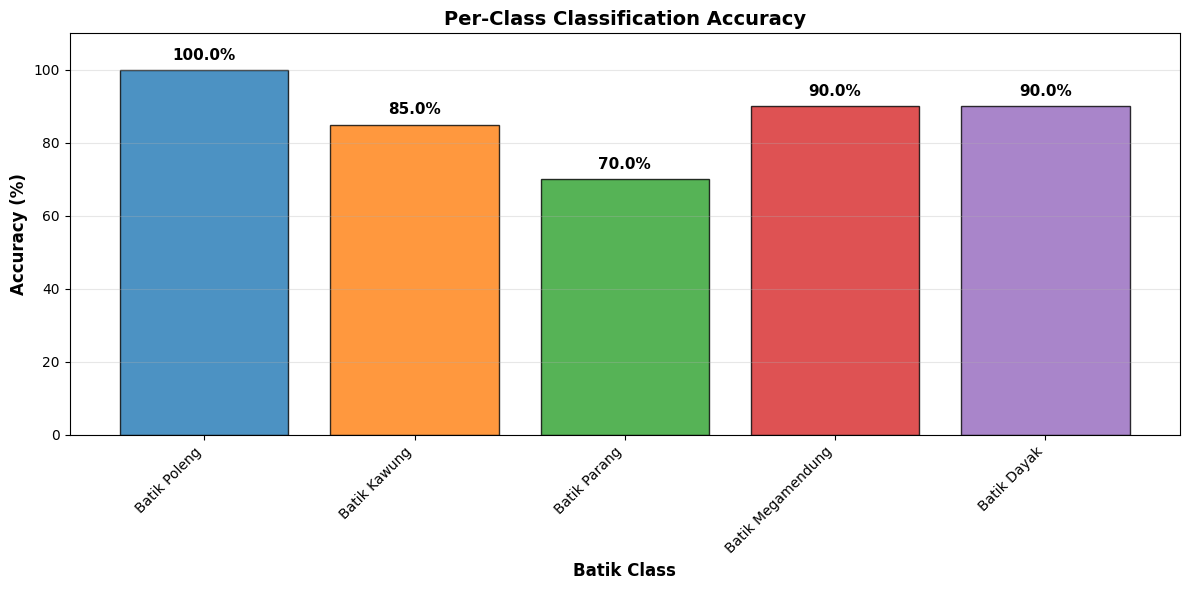


--- Menampilkan Contoh Hasil Prediksi ---
Found 100 images belonging to 5 classes.


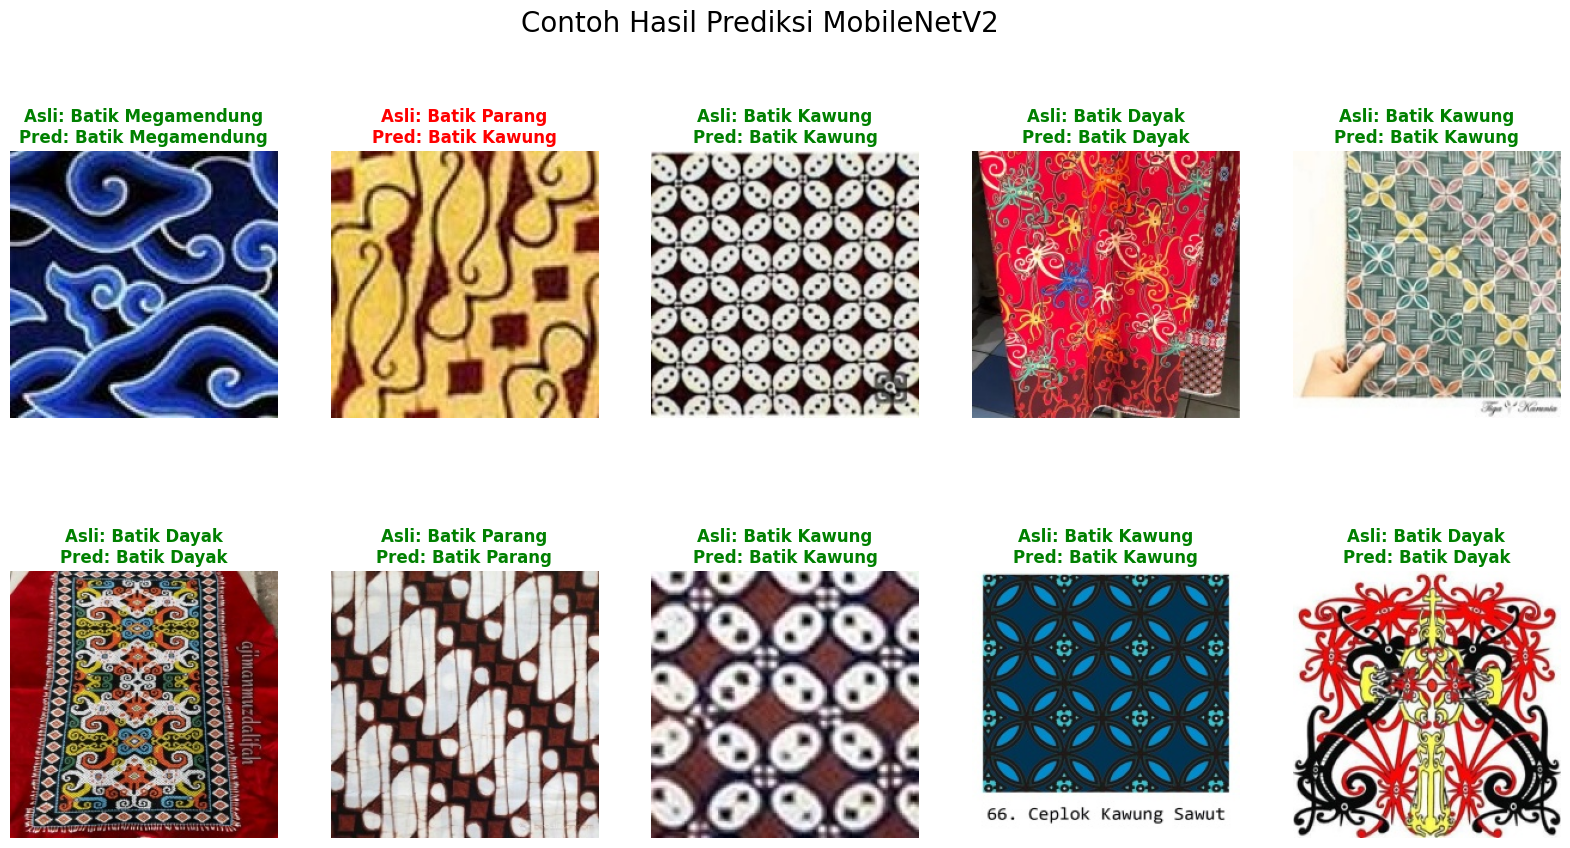


MENYIMPAN MODEL & METADATA
✅ Model berhasil disimpan: model_batik_mobilenetv2_fixed.h5
✅ Metadata berhasil disimpan: model_batik_mobilenetv2_fixed.pkl

🔍 VALIDASI METADATA:
✅ confusion_matrix: TERSIMPAN
   Shape: (5, 5)
✅ precision: TERSIMPAN
✅ per_class_accuracy: TERSIMPAN

📋 Total keys dalam metadata: 24
📋 Keys: ['history', 'total_epochs', 'final_accuracy', 'final_loss', 'best_val_accuracy', 'best_val_accuracy_epoch', 'class_names', 'class_indices', 'num_classes', 'y_true', 'y_pred', 'predictions_proba', 'confusion_matrix', 'confusion_matrix_normalized', 'per_class_accuracy', 'precision', 'recall', 'f1_score', 'support', 'macro_avg', 'weighted_avg', 'training_config', 'classification_report_text', 'dataset_info']

TRAINING SUMMARY
Total Epochs: 20
Final Test Accuracy: 87.00%
Best Val Accuracy: 87.00% (Epoch 12)

Per-Class Accuracy:
  Batik Poleng        : 100.00%
  Batik Kawung        : 85.00%
  Batik Parang        : 70.00%
  Batik Megamendung   : 90.00%
  Batik Dayak         : 90.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ model_batik_mobilenetv2_fixed.h5 downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ model_batik_mobilenetv2_fixed.pkl downloaded

🎉 SEMUA FILE BERHASIL DIDOWNLOAD!

✅ TRAINING SELESAI!
📦 Model: model_batik_mobilenetv2_fixed.h5
📦 Dashboard Data: model_batik_mobilenetv2_fixed.pkl

⚠️ PENTING:
   Pastikan file .pkl yang baru di-download digunakan di dashboard!
   Hapus file .pkl lama jika ada di folder 'models'


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pickle
from google.colab import files


# ==========================================
# 1. KONFIGURASI DATA
# ==========================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

base_dir = '/content/dataset/DATASET'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

selected_classes = [
    'Batik Poleng',
    'Batik Kawung',
    'Batik Parang',
    'Batik Megamendung',
    'Batik Dayak'
]

# Augmentasi Data (UPDATED - Lebih Agresif)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,              # ↑ Naikkan
    width_shift_range=0.25,         # ↑ Naikkan
    height_shift_range=0.25,        # ↑ Naikkan
    shear_range=0.2,
    zoom_range=0.25,                # ↑ Naikkan
    horizontal_flip=True,
    vertical_flip=True,             # ✅ TAMBAHKAN
    brightness_range=[0.8, 1.2],    # ✅ TAMBAHKAN
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

print("--- Memuat Data Training ---")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    shuffle=True
)

print("\n--- Memuat Data Testing ---")
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    shuffle=False
)

# Print dataset info
print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Train samples: {train_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_generator)}")
print(f"Classes: {selected_classes}")
print("="*60)


# ==========================================
# 2. ARSITEKTUR TRANSFER LEARNING
# ==========================================
print("\n" + "="*60)
print("BUILDING MODEL")
print("="*60)

# Definisi Input Eksplisit
inputs = Input(shape=(224, 224, 3), name='input_layer')

# Ambil Base Model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=inputs
)

# Bekukan Base Model
base_model.trainable = False

# Rakit Model Baru
x = base_model.output
x = GlobalAveragePooling2D(name='global_avg_pool')(x)
x = Dense(128, activation='relu', name='dense_128')(x)
x = BatchNormalization(name='bn_128')(x)
x = Dropout(0.5, name='dropout_128')(x)
outputs = Dense(5, activation='softmax', name='output')(x)

# Gabungkan Input & Output
model = Model(inputs=inputs, outputs=outputs, name='MobileNetV2_Batik')

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


# ==========================================
# 3. TRAINING
# ==========================================
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.000001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

print("\n" + "="*60)
print("MULAI TRAINING")
print("="*60)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)


# ==========================================
# 4. EVALUASI LENGKAP
# ==========================================
print("\n" + "="*60)
print("EVALUASI MODEL")
print("="*60)

# Evaluate
final_loss, final_accuracy = model.evaluate(test_generator, verbose=0)
print(f"📉 Final Loss: {final_loss:.4f}")
print(f"📈 Final Accuracy: {final_accuracy * 100:.2f}%")

# Predictions
print("\n🔮 Melakukan prediksi...")
test_generator.reset()
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = selected_classes  # Gunakan selected_classes, bukan dari class_indices

# Confusion Matrix
print("\n📊 CONFUSION MATRIX:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Classification Report
print("\n📊 CLASSIFICATION REPORT:")
class_report_text = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(class_report_text)

# Per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=range(len(class_names))
)
per_class_acc = cm.diagonal() / cm.sum(axis=1) * 100

# Macro & Weighted averages
macro_precision = precision.mean()
macro_recall = recall.mean()
macro_f1 = f1.mean()
macro_accuracy = per_class_acc.mean()

weighted_precision = (precision * support).sum() / support.sum()
weighted_recall = (recall * support).sum() / support.sum()
weighted_f1 = (f1 * support).sum() / support.sum()

# Best validation accuracy
best_val_acc = max(history.history['val_accuracy'])
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1

print(f"\n🎯 Best Validation Accuracy: {best_val_acc*100:.2f}% (Epoch {best_val_acc_epoch})")
print(f"📊 Macro Avg - Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1: {macro_f1:.4f}")
print(f"📊 Weighted Avg - Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1: {weighted_f1:.4f}")


# ==========================================
# 5. PLOT GRAFIK
# ==========================================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi Model')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()

# Per-Class Accuracy Bar Chart
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = plt.bar(range(len(class_names)), per_class_acc, color=colors, alpha=0.8, edgecolor='black')

for i, (bar, acc_val) in enumerate(zip(bars, per_class_acc)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{acc_val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Batik Class', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Per-Class Classification Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ==========================================
# 6. VISUALISASI PREDIKSI SAMPLE
# ==========================================
def visualize_results(generator, model):
    temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, target_size=IMG_SIZE, batch_size=10,
        classes=selected_classes, shuffle=True
    )
    images, labels = next(temp_gen)
    preds = model.predict(images, verbose=0)
    pred_indices = np.argmax(preds, axis=1)
    true_indices = np.argmax(labels, axis=1)

    plt.figure(figsize=(20, 10))
    for i in range(min(10, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        col = 'green' if true_indices[i] == pred_indices[i] else 'red'
        plt.title(f"Asli: {class_names[true_indices[i]]}\nPred: {class_names[pred_indices[i]]}",
                  color=col, fontsize=12, fontweight='bold')
        plt.axis('off')
    plt.suptitle("Contoh Hasil Prediksi MobileNetV2", fontsize=20)
    plt.show()

print("\n--- Menampilkan Contoh Hasil Prediksi ---")
visualize_results(test_generator, model)


# ==========================================
# 7. SIMPAN MODEL & METADATA LENGKAP (VALIDATED)
# ==========================================
print("\n" + "="*60)
print("MENYIMPAN MODEL & METADATA")
print("="*60)

# Simpan Model (.h5)
model_filename = 'model_batik_mobilenetv2_fixed.h5'
model.save(model_filename, save_format='h5')
print(f"✅ Model berhasil disimpan: {model_filename}")

# Simpan Metadata LENGKAP untuk Dashboard (.pkl)
metadata_dashboard = {
    # ===== TRAINING HISTORY =====
    'history': history.history,
    'total_epochs': len(history.history['loss']),

    # ===== FINAL METRICS =====
    'final_accuracy': float(final_accuracy),
    'final_loss': float(final_loss),
    'best_val_accuracy': float(best_val_acc),
    'best_val_accuracy_epoch': int(best_val_acc_epoch),

    # ===== CLASS INFO =====
    'class_names': class_names,
    'class_indices': dict(train_generator.class_indices),
    'num_classes': len(class_names),

    # ===== PREDICTIONS =====
    'y_true': y_true.tolist(),
    'y_pred': y_pred.tolist(),
    'predictions_proba': Y_pred.tolist(),

    # ===== CONFUSION MATRIX (PENTING!) =====
    'confusion_matrix': cm.tolist(),
    'confusion_matrix_normalized': (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).tolist(),

    # ===== PER-CLASS METRICS =====
    'per_class_accuracy': per_class_acc.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'f1_score': f1.tolist(),
    'support': support.tolist(),

    # ===== AGGREGATE METRICS =====
    'macro_avg': {
        'precision': float(macro_precision),
        'recall': float(macro_recall),
        'f1_score': float(macro_f1),
        'accuracy': float(macro_accuracy)
    },
    'weighted_avg': {
        'precision': float(weighted_precision),
        'recall': float(weighted_recall),
        'f1_score': float(weighted_f1)
    },

    # ===== TRAINING CONFIG =====
    'training_config': {
        'img_size': IMG_SIZE,
        'batch_size': BATCH_SIZE,
        'model_type': 'MobileNetV2',
        'base_model': 'imagenet',
        'optimizer': 'Adam',
        'initial_learning_rate': 0.0001,
        'augmentation': 'moderate-aggressive',
        'frozen_base': True
    },

    # ===== CLASSIFICATION REPORT TEXT =====
    'classification_report_text': class_report_text,

    # ===== DATASET INFO =====
    'dataset_info': {
        'train_samples': train_generator.samples,
        'test_samples': test_generator.samples,
        'train_dir': train_dir,
        'test_dir': test_dir
    }
}

pkl_filename = 'model_batik_mobilenetv2_fixed.pkl'
with open(pkl_filename, 'wb') as f:
    pickle.dump(metadata_dashboard, f)
print(f"✅ Metadata berhasil disimpan: {pkl_filename}")

# VALIDASI: Cek apakah confusion matrix tersimpan dengan benar
print("\n🔍 VALIDASI METADATA:")
with open(pkl_filename, 'rb') as f:
    check_metadata = pickle.load(f)

if 'confusion_matrix' in check_metadata:
    print("✅ confusion_matrix: TERSIMPAN")
    print(f"   Shape: {np.array(check_metadata['confusion_matrix']).shape}")
else:
    print("❌ confusion_matrix: TIDAK DITEMUKAN!")

if 'precision' in check_metadata:
    print("✅ precision: TERSIMPAN")
else:
    print("❌ precision: TIDAK DITEMUKAN!")

if 'per_class_accuracy' in check_metadata:
    print("✅ per_class_accuracy: TERSIMPAN")
else:
    print("❌ per_class_accuracy: TIDAK DITEMUKAN!")

print(f"\n📋 Total keys dalam metadata: {len(check_metadata.keys())}")
print(f"📋 Keys: {list(check_metadata.keys())}")


# ==========================================
# 8. PRINT SUMMARY
# ==========================================
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs: {len(history.history['loss'])}")
print(f"Final Test Accuracy: {final_accuracy*100:.2f}%")
print(f"Best Val Accuracy: {best_val_acc*100:.2f}% (Epoch {best_val_acc_epoch})")
print(f"\nPer-Class Accuracy:")
for cls, acc_val in zip(class_names, per_class_acc):
    print(f"  {cls:20s}: {acc_val:5.2f}%")
print("="*60)


# ==========================================
# 9. DOWNLOAD FILE
# ==========================================
print("\n" + "="*60)
print("DOWNLOADING FILES...")
print("="*60)

files_to_download = [
    model_filename,
    pkl_filename
]

try:
    for file in files_to_download:
        if os.path.exists(file):
            files.download(file)
            print(f"  ✅ {file} downloaded")
        else:
            print(f"  ⚠️ {file} not found")
    print("\n🎉 SEMUA FILE BERHASIL DIDOWNLOAD!")
except Exception as e:
    print(f"\n⚠️ Error: {e}")
    print("Silakan download manual dari file explorer Colab")

print("\n" + "="*60)
print("✅ TRAINING SELESAI!")
print("="*60)
print(f"📦 Model: {model_filename}")
print(f"📦 Dashboard Data: {pkl_filename}")
print("\n⚠️ PENTING:")
print("   Pastikan file .pkl yang baru di-download digunakan di dashboard!")
print("   Hapus file .pkl lama jika ada di folder 'models'")
print("="*60)

# **PreTrained - ResNet50**

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.utils import class_weight
import seaborn as sns
import pickle
from google.colab import files


# ==========================================
# 1. KONFIGURASI DATA
# ==========================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

base_dir = '/content/dataset/DATASET'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

selected_classes = [
    'Batik Poleng',
    'Batik Kawung',
    'Batik Parang',
    'Batik Megamendung',
    'Batik Dayak'
]

# Augmentasi Data (AGGRESSIVE)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

print("--- Memuat Data Training ---")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    shuffle=True
)

print("\n--- Memuat Data Testing ---")
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    classes=selected_classes,
    class_mode='categorical',
    shuffle=False
)

# Print dataset info
print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Train samples: {train_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_generator)}")
print(f"Classes: {selected_classes}")
print("="*60)


# ==========================================
# 2. ARSITEKTUR RESNET50 (FUNCTIONAL API - FIXED)
# ==========================================
print("\n" + "="*60)
print("BUILDING MODEL ARCHITECTURE")
print("="*60)

# GUNAKAN FUNCTIONAL API UNTUK KOMPATIBILITAS
inputs = Input(shape=(224, 224, 3), name='input_layer')

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=inputs  # ← PENTING: Gunakan input_tensor
)

base_model.trainable = False

# Build custom head dengan nama layer yang jelas
x = base_model.output
x = GlobalAveragePooling2D(name='global_avg_pool')(x)
x = Dense(256, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.01),
          name='dense_256')(x)
x = BatchNormalization(name='bn_256')(x)
x = Dropout(0.5, name='dropout_256')(x)
x = Dense(128, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.01),
          name='dense_128')(x)
x = BatchNormalization(name='bn_128')(x)
x = Dropout(0.4, name='dropout_128')(x)
outputs = Dense(5, activation='softmax', name='output_layer')(x)

# Create model using Functional API
model = Model(inputs=inputs, outputs=outputs, name='ResNet50_Batik')

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()


# ==========================================
# 3. PHASE 1: TRAINING HEAD (FROZEN BASE)
# ==========================================
print("\n" + "="*60)
print("PHASE 1: TRAINING HEAD LAYER (BASE MODEL FROZEN)")
print("="*60)

callbacks_phase1 = [
    ModelCheckpoint(
        'best_model_phase1.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

history_phase1 = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=callbacks_phase1,
    verbose=1
)

# Load best weights
model.load_weights('best_model_phase1.h5')
print("\n✅ Phase 1 selesai. Best weights loaded.")


# ==========================================
# 4. PHASE 2: FINE-TUNING (UNFREEZE 30 LAYERS)
# ==========================================
print("\n" + "="*60)
print("PHASE 2: FINE-TUNING (UNFREEZE 30 TOP LAYERS)")
print("="*60)

base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Total layers: {len(base_model.layers)}")
print(f"Trainable layers: {sum([1 for l in base_model.layers if l.trainable])}")

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_phase2 = [
    ModelCheckpoint(
        'best_model_phase2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=12,
        restore_best_weights=True,
        verbose=1
    )
]

initial_epoch_phase2 = len(history_phase1.history['loss'])

history_phase2 = model.fit(
    train_generator,
    epochs=initial_epoch_phase2 + 30,
    initial_epoch=initial_epoch_phase2,
    validation_data=test_generator,
    callbacks=callbacks_phase2,
    verbose=1
)

# Load best weights jika ada
if os.path.exists('best_model_phase2.h5'):
    model.load_weights('best_model_phase2.h5')
    print("\n✅ Phase 2 selesai. Best weights loaded.")
else:
    print("\n⚠️ Phase 2 tidak improve, menggunakan weights Phase 1")


# ==========================================
# 5. PHASE 3: DEEP FINE-TUNING + CLASS WEIGHTS
# ==========================================
print("\n" + "="*60)
print("PHASE 3: DEEP FINE-TUNING (UNFREEZE 100 LAYERS + CLASS WEIGHTS)")
print("="*60)

base_model.trainable = True
fine_tune_at = len(base_model.layers) - 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Trainable layers: {sum([1 for l in base_model.layers if l.trainable])}")

# Hitung class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")

model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_phase3 = [
    ModelCheckpoint(
        'best_model_phase3.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-8,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

initial_epoch_phase3 = initial_epoch_phase2 + len(history_phase2.history['loss'])

history_phase3 = model.fit(
    train_generator,
    epochs=initial_epoch_phase3 + 25,
    initial_epoch=initial_epoch_phase3,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=callbacks_phase3,
    verbose=1
)

# Load best weights jika ada
if os.path.exists('best_model_phase3.h5'):
    model.load_weights('best_model_phase3.h5')
    print("\n✅ Phase 3 selesai. Best weights loaded.")
else:
    print("\n⚠️ Phase 3 tidak improve")


# ==========================================
# 6. EVALUASI FINAL
# ==========================================
print("\n" + "="*60)
print("EVALUASI FINAL")
print("="*60)

final_loss, final_accuracy = model.evaluate(test_generator, verbose=0)
print(f"📉 Final Loss: {final_loss:.4f}")
print(f"📈 Final Accuracy: {final_accuracy * 100:.2f}%")

# Predictions
print("\n🔮 Melakukan prediksi...")
test_generator.reset()
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = selected_classes

# Classification Report
print("\n📊 CLASSIFICATION REPORT:")
class_report_text = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(class_report_text)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("\n📊 CONFUSION MATRIX:")
print(cm)

# Per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=range(len(class_names))
)
per_class_acc = cm.diagonal() / cm.sum(axis=1) * 100

# Macro & Weighted averages
macro_precision = precision.mean()
macro_recall = recall.mean()
macro_f1 = f1.mean()
macro_accuracy = per_class_acc.mean()

weighted_precision = (precision * support).sum() / support.sum()
weighted_recall = (recall * support).sum() / support.sum()
weighted_f1 = (f1 * support).sum() / support.sum()

# Best validation accuracy
best_val_acc_epoch = np.argmax(history_phase1.history['val_accuracy']) + 1

print(f"\n🎯 Macro Avg - Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1: {macro_f1:.4f}")
print(f"📊 Weighted Avg - Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1: {weighted_f1:.4f}")


# ==========================================
# 7. GABUNGKAN HISTORY DARI 3 PHASE
# ==========================================
def safe_get_history(hist_obj):
    """Safely extract history dict"""
    if hasattr(hist_obj, 'history'):
        return hist_obj.history
    elif isinstance(hist_obj, dict):
        return hist_obj
    return {}

hist1 = safe_get_history(history_phase1)
hist2 = safe_get_history(history_phase2)
hist3 = safe_get_history(history_phase3)

# Gabungkan semua history
history_combined = {
    'loss': hist1.get('loss', []) + hist2.get('loss', []) + hist3.get('loss', []),
    'accuracy': hist1.get('accuracy', []) + hist2.get('accuracy', []) + hist3.get('accuracy', []),
    'val_loss': hist1.get('val_loss', []) + hist2.get('val_loss', []) + hist3.get('val_loss', []),
    'val_accuracy': hist1.get('val_accuracy', []) + hist2.get('val_accuracy', []) + hist3.get('val_accuracy', [])
}

# Epoch boundaries
epoch_phase1_end = len(hist1.get('loss', []))
epoch_phase2_end = epoch_phase1_end + len(hist2.get('loss', []))
epoch_phase3_end = epoch_phase2_end + len(hist3.get('loss', []))

best_val_acc = max(history_combined['val_accuracy']) if history_combined['val_accuracy'] else 0
best_val_acc_epoch_combined = np.argmax(history_combined['val_accuracy']) + 1 if history_combined['val_accuracy'] else 0


# ==========================================
# 8. VISUALISASI LENGKAP
# ==========================================
print("\n📊 Generating visualizations...")

total_epochs = range(1, len(history_combined['loss']) + 1)

# --- PLOT 1: LOSS (3 PHASES) ---
fig_loss = plt.figure(figsize=(14, 6))
plt.plot(total_epochs, history_combined['loss'], label='Training Loss', linewidth=2.5, color='#1f77b4')
plt.plot(total_epochs, history_combined['val_loss'], label='Validation Loss', linewidth=2.5, color='#ff7f0e')

if epoch_phase1_end > 0:
    plt.axvline(x=epoch_phase1_end, color='red', linestyle='--', linewidth=2,
                label=f'Phase 2 Start (Epoch {epoch_phase1_end})', alpha=0.7)
if epoch_phase2_end > epoch_phase1_end:
    plt.axvline(x=epoch_phase2_end, color='green', linestyle='--', linewidth=2,
                label=f'Phase 3 Start (Epoch {epoch_phase2_end})', alpha=0.7)

plt.title('Training & Validation Loss (3 Phases)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('loss_plot_3phases.png', dpi=150, bbox_inches='tight')
print("✅ loss_plot_3phases.png saved")
plt.close()

# --- PLOT 2: ACCURACY (3 PHASES) ---
fig_acc = plt.figure(figsize=(14, 6))
plt.plot(total_epochs, history_combined['accuracy'], label='Training Accuracy', linewidth=2.5, color='#2ca02c')
plt.plot(total_epochs, history_combined['val_accuracy'], label='Validation Accuracy', linewidth=2.5, color='#d62728')

if epoch_phase1_end > 0:
    plt.axvline(x=epoch_phase1_end, color='red', linestyle='--', linewidth=2,
                label=f'Phase 2 Start', alpha=0.7)
if epoch_phase2_end > epoch_phase1_end:
    plt.axvline(x=epoch_phase2_end, color='green', linestyle='--', linewidth=2,
                label=f'Phase 3 Start', alpha=0.7)

plt.axhline(y=best_val_acc, color='purple', linestyle=':', linewidth=2, alpha=0.5,
            label=f'Best Val Acc: {best_val_acc:.3f}')

plt.title('Training & Validation Accuracy (3 Phases)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(alpha=0.3)
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('accuracy_plot_3phases.png', dpi=150, bbox_inches='tight')
print("✅ accuracy_plot_3phases.png saved")
plt.close()

# --- PLOT 3: CONFUSION MATRIX ---
fig_cm, ax = plt.subplots(figsize=(11, 9))
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

annot_text = np.array([[f'{count}\n({pct:.1f}%)'
                        for count, pct in zip(row_counts, row_pcts)]
                       for row_counts, row_pcts in zip(cm, cm_percent)])

sns.heatmap(cm, annot=annot_text, fmt='', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 11, 'weight': 'bold'},
            linewidths=1.5, linecolor='gray',
            ax=ax)

plt.title('Confusion Matrix - Final Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('True Label', fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

overall_acc = np.trace(cm) / cm.sum() * 100
plt.text(0.5, -0.15, f'Overall Accuracy: {overall_acc:.2f}%',
         transform=ax.transAxes, ha='center', fontsize=12,
         fontweight='bold', style='italic')

plt.tight_layout()
plt.savefig('confusion_matrix_final.png', dpi=150, bbox_inches='tight')
print("✅ confusion_matrix_final.png saved")
plt.close()

# --- PLOT 4: PER-CLASS ACCURACY ---
fig_class_acc = plt.figure(figsize=(12, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

bars = plt.bar(range(len(class_names)), per_class_acc,
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for i, (bar, acc) in enumerate(zip(bars, per_class_acc)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{acc:.1f}%', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

    correct = cm.diagonal()[i]
    total = cm.sum(axis=1)[i]
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{correct}/{total}', ha='center', va='center',
             fontsize=10, fontweight='bold', color='white')

plt.xlabel('Batik Class', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='bold', labelpad=10)
plt.title('Per-Class Classification Accuracy', fontsize=16, fontweight='bold', pad=15)
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right', fontsize=11)
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)

mean_acc = per_class_acc.mean()
plt.axhline(y=mean_acc, color='red', linestyle='--', linewidth=2, alpha=0.6,
            label=f'Mean: {mean_acc:.1f}%')
plt.legend(fontsize=11)

plt.tight_layout()
plt.savefig('per_class_accuracy_final.png', dpi=150, bbox_inches='tight')
print("✅ per_class_accuracy_final.png saved")
plt.close()

# --- PLOT 5: CLASSIFICATION REPORT TABLE ---
fig_report = plt.figure(figsize=(12, 8))
ax = fig_report.add_subplot(111)
ax.axis('tight')
ax.axis('off')

table_data = [['Class', 'Precision', 'Recall', 'F1-Score', 'Support', 'Accuracy']]

for i, class_name in enumerate(class_names):
    table_data.append([
        class_name,
        f'{precision[i]:.4f}',
        f'{recall[i]:.4f}',
        f'{f1[i]:.4f}',
        f'{support[i]}',
        f'{per_class_acc[i]:.2f}%'
    ])

table_data.append(['', '', '', '', '', ''])
table_data.append([
    'Macro Avg',
    f'{precision.mean():.4f}',
    f'{recall.mean():.4f}',
    f'{f1.mean():.4f}',
    f'{support.sum()}',
    f'{per_class_acc.mean():.2f}%'
])

table_data.append([
    'Weighted Avg',
    f'{weighted_precision:.4f}',
    f'{weighted_recall:.4f}',
    f'{weighted_f1:.4f}',
    f'{support.sum()}',
    f'{final_accuracy*100:.2f}%'
])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.25, 0.15, 0.15, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

for i in range(6):
    cell = table[(0, i)]
    cell.set_facecolor('#4472C4')
    cell.set_text_props(weight='bold', color='white', fontsize=11)

for i in [-2, -1]:
    for j in range(6):
        cell = table[(len(table_data) + i, j)]
        cell.set_facecolor('#E7E6E6')
        cell.set_text_props(weight='bold')

plt.title('Classification Report - Detailed Metrics', fontsize=16, fontweight='bold', pad=20)
plt.savefig('classification_report_table.png', dpi=150, bbox_inches='tight')
print("✅ classification_report_table.png saved")
plt.close()


# ==========================================
# 9. SIMPAN MODEL & METADATA (FIXED FOR DASHBOARD)
# ==========================================
print("\n" + "="*60)
print("MENYIMPAN MODEL & METADATA")
print("="*60)

# Simpan model lengkap
model_filename = 'model_batik_resnet50_final.h5'
try:
    model.save(model_filename, save_format='h5', include_optimizer=False)
    print(f"✅ {model_filename} saved")
except Exception as e:
    print(f"❌ Failed to save model: {e}")

# Simpan weights terpisah (FIXED - Format Keras 3)
weights_filename = 'model_batik_resnet50.weights.h5'
try:
    model.save_weights(weights_filename)
    print(f"✅ {weights_filename} saved (backup)")
except Exception as e:
    print(f"⚠️ Could not save weights: {e}")

# Metadata LENGKAP untuk dashboard
metadata_dashboard = {
    # ===== TRAINING HISTORY =====
    'history_phase1': hist1,
    'history_phase2': hist2,
    'history_phase3': hist3,
    'history_combined': history_combined,

    # ===== PHASE BOUNDARIES =====
    'epoch_phase1_end': int(epoch_phase1_end),
    'epoch_phase2_end': int(epoch_phase2_end),
    'epoch_phase3_end': int(epoch_phase3_end),
    'total_epochs': len(history_combined['loss']),

    # ===== FINAL METRICS =====
    'final_accuracy': float(final_accuracy),
    'final_loss': float(final_loss),
    'best_val_accuracy': float(best_val_acc),
    'best_val_accuracy_epoch': int(best_val_acc_epoch_combined),

    # ===== CLASS INFO =====
    'class_names': class_names,
    'class_indices': dict(train_generator.class_indices),
    'num_classes': len(class_names),

    # ===== PREDICTIONS =====
    'y_true': y_true.tolist(),
    'y_pred': y_pred.tolist(),
    'predictions_proba': Y_pred.tolist(),

    # ===== CONFUSION MATRIX (PENTING!) =====
    'confusion_matrix': cm.tolist(),
    'confusion_matrix_normalized': (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).tolist(),

    # ===== PER-CLASS METRICS =====
    'per_class_accuracy': per_class_acc.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'f1_score': f1.tolist(),
    'support': support.tolist(),

    # ===== AGGREGATE METRICS =====
    'macro_avg': {
        'precision': float(macro_precision),
        'recall': float(macro_recall),
        'f1_score': float(macro_f1),
        'accuracy': float(macro_accuracy)
    },
    'weighted_avg': {
        'precision': float(weighted_precision),
        'recall': float(weighted_recall),
        'f1_score': float(weighted_f1)
    },

    # ===== TRAINING CONFIG =====
    'training_config': {
        'img_size': IMG_SIZE,
        'batch_size': BATCH_SIZE,
        'model_type': 'ResNet50',
        'base_model': 'imagenet',
        'augmentation': 'aggressive',
        'phase1': {
            'epochs': len(hist1.get('loss', [])),
            'frozen_base': True,
            'initial_lr': 0.001
        },
        'phase2': {
            'epochs': len(hist2.get('loss', [])),
            'unfrozen_layers': 30,
            'initial_lr': 1e-5
        },
        'phase3': {
            'epochs': len(hist3.get('loss', [])),
            'unfrozen_layers': 100,
            'initial_lr': 1e-6,
            'class_weights': {str(k): float(v) for k, v in class_weight_dict.items()}
        }
    },

    # ===== MODEL ARCHITECTURE INFO (PENTING UNTUK REBUILD!) =====
    'model_architecture': {
        'type': 'Functional',
        'input_shape': (224, 224, 3),
        'base_model': 'ResNet50',
        'custom_layers': ['GlobalAveragePooling2D', 'Dense(256)', 'BatchNorm', 'Dropout(0.5)',
                          'Dense(128)', 'BatchNorm', 'Dropout(0.4)', 'Dense(5)']
    },

    # ===== CLASSIFICATION REPORT TEXT =====
    'classification_report_text': class_report_text,

    # ===== DATASET INFO =====
    'dataset_info': {
        'train_samples': train_generator.samples,
        'test_samples': test_generator.samples,
        'train_dir': train_dir,
        'test_dir': test_dir
    }
}

# Simpan ke PKL
pkl_filename = 'batik_model_dashboard_data.pkl'
try:
    with open(pkl_filename, 'wb') as f:
        pickle.dump(metadata_dashboard, f)
    print(f"✅ {pkl_filename} saved")
except Exception as e:
    print(f"❌ Error saving metadata: {e}")

# VALIDASI: Cek apakah semua data tersimpan
print("\n🔍 VALIDASI METADATA:")
with open(pkl_filename, 'rb') as f:
    check_metadata = pickle.load(f)

required_keys = ['confusion_matrix', 'precision', 'per_class_accuracy', 'history_combined']
for key in required_keys:
    if key in check_metadata:
        print(f"✅ {key}: TERSIMPAN")
    else:
        print(f"❌ {key}: TIDAK DITEMUKAN!")

print(f"\n📋 Total keys dalam metadata: {len(check_metadata.keys())}")


# ==========================================
# 10. PRINT SUMMARY
# ==========================================
print("\n" + "="*60)
print("TRAINING SUMMARY (3 PHASES)")
print("="*60)
print(f"Phase 1 Epochs: {epoch_phase1_end}")
print(f"Phase 2 Epochs: {epoch_phase2_end - epoch_phase1_end}")
print(f"Phase 3 Epochs: {epoch_phase3_end - epoch_phase2_end}")
print(f"Total Epochs: {epoch_phase3_end}")
print(f"\nFinal Test Accuracy: {final_accuracy*100:.2f}%")
print(f"Best Val Accuracy: {best_val_acc*100:.2f}% (Epoch {best_val_acc_epoch_combined})")
print(f"\nPer-Class Accuracy:")
for cls, acc in zip(class_names, per_class_acc):
    print(f"  {cls:20s}: {acc:5.2f}%")


# ==========================================
# 11. DOWNLOAD SEMUA FILE
# ==========================================
print("\n" + "="*60)
print("DOWNLOADING FILES...")
print("="*60)

files_to_download = [
    model_filename,
    pkl_filename,
    'loss_plot_3phases.png',
    'accuracy_plot_3phases.png',
    'confusion_matrix_final.png',
    'per_class_accuracy_final.png',
    'classification_report_table.png',
]

# Tambahkan weights file jika ada
if os.path.exists(weights_filename):
    files_to_download.append(weights_filename)

# Tambahkan best model files jika ada
for phase_file in ['best_model_phase1.h5', 'best_model_phase2.h5', 'best_model_phase3.h5']:
    if os.path.exists(phase_file):
        files_to_download.append(phase_file)

try:
    for file in files_to_download:
        if os.path.exists(file):
            files.download(file)
            print(f"  ✅ {file}")
        else:
            print(f"  ⚠️ {file} not found")
    print("\n🎉 SEMUA FILE BERHASIL DIDOWNLOAD!")
except Exception as e:
    print(f"\n⚠️ Error: {e}")
    print("Silakan download manual dari file explorer Colab")

print("\n" + "="*60)
print("✅ TRAINING SELESAI!")
print("="*60)
print(f"📦 Model: {model_filename}")
print(f"📦 Weights (backup): {weights_filename}")
print(f"📦 Dashboard Data: {pkl_filename}")
print(f"📊 Visualizations: 5 PNG files")
print("\n⚠️ PENTING UNTUK DASHBOARD:")
print("   1. Gunakan file .pkl yang baru di-download")
print("   2. Model sudah menggunakan Functional API yang kompatibel")
print("   3. Gunakan fungsi load_resnet_model() yang sudah diperbaiki di dashboard")
print("="*60)

--- Memuat Data Training ---
Found 350 images belonging to 5 classes.

--- Memuat Data Testing ---
Found 100 images belonging to 5 classes.

DATASET INFORMATION
Train samples: 350
Test samples: 100
Batch size: 32
Steps per epoch: 11
Classes: ['Batik Poleng', 'Batik Kawung', 'Batik Parang', 'Batik Megamendung', 'Batik Dayak']

BUILDING MODEL ARCHITECTURE
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

MODEL ARCHITECTURE


Model: "ResNet50_Batik"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,147,333 (92.11 MB)

 Trainable params: 558,853 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)


PHASE 1: TRAINING HEAD LAYER (BASE MODEL FROZEN)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2384 - loss: 7.8627
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2423 - loss: 7.8233 - val_accuracy: 0.2100 - val_loss: 6.4000 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.3209 - loss: 6.1561
Epoch 2: val_accuracy did not improve from 0.21000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.3213 - loss: 6.1366 - val_accuracy: 0.2100 - val_loss: 5.3011 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.4075 - loss: 4.9243
Epoch 3: val_accuracy did not improve from 0.21000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.4071 - loss: 4.9124 - val_accuracy: 0.2100 - val_loss: 4.7422 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.3761 - loss: 4.3965
Epoch 4: val_accuracy did not improve from 0.21000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 590ms/step - accuracy: 0.3778 - loss: 4.3851 - val_accuracy: 0.2100 - val_loss: 4.2616 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - accuracy: 0.4087 - loss: 3.9433 - val_accuracy: 0.2200 - val_loss: 3.9930 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.4242 - loss: 3.7024
Epoch 6: val_accuracy did not improve from 0.22000
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 600ms/step - accuracy: 0.4248 - loss: 3.6987 - val_accuracy: 0.2200 - val_loss: 3.7487 - learning_rate: 0.0010
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.4181 - loss: 3.6500
Epoch 7: val_accuracy did not improve from 0.22000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.4173 - loss: 3.6463 - val_accuracy: 0.2100 - val_loss: 3.7406 - learning_rate: 0.0010
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.4016 - loss: 3.4848
Epoch 8: val_accuracy improved from 0.22000 to 0.25000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 630ms/step - accuracy: 0.4020 - loss: 3.4870 - val_accuracy: 0.2500 - val_loss: 3.5226 - learning_rate: 0.0010
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4519 - loss: 3.2021
Epoch 9: val_accuracy improved from 0.25000 to 0.26000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.4505 - loss: 3.2107 - val_accuracy: 0.2600 - val_loss: 3.4233 - learning_rate: 0.0010
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.4556 - loss: 3.2665
Epoch 10: val_accuracy did not improve from 0.26000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 570ms/step - accuracy: 0.4550 - loss: 3.2641 - val_accuracy: 0.2300 - val_loss: 3.5793 - learning_rate: 0.0010
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.4196 - loss: 3.1502
Epoch 11: val_accuracy improved from 0.26000 to 0.31000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.4199 - loss: 3.1548 - val_accuracy: 0.3100 - val_loss: 3.1141 - learning_rate: 0.0010
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.4650 - loss: 3.0512
Epoch 12: val_accuracy improved from 0.31000 to 0.39000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 675ms/step - accuracy: 0.4627 - loss: 3.0529 - val_accuracy: 0.3900 - val_loss: 2.9640 - learning_rate: 0.0010
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.4904 - loss: 2.9091
Epoch 13: val_accuracy improved from 0.39000 to 0.40000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.4879 - loss: 2.9190 - val_accuracy: 0.4000 - val_loss: 2.9522 - learning_rate: 0.0010
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.4415 - loss: 2.8860
Epoch 14: val_accuracy improved from 0.40000 to 0.42000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 693ms/step - accuracy: 0.4404 - loss: 2.8864 - val_accuracy: 0.4200 - val_loss: 2.9706 - learning_rate: 0.0010
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.4536 - loss: 2.7472
Epoch 15: val_accuracy improved from 0.42000 to 0.43000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - accuracy: 0.4543 - loss: 2.7533 - val_accuracy: 0.4300 - val_loss: 2.8099 - learning_rate: 0.0010
Epoch 16/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4246 - loss: 2.8886
Epoch 16: val_accuracy improved from 0.43000 to 0.47000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.4271 - loss: 2.8869 - val_accuracy: 0.4700 - val_loss: 2.7689 - learning_rate: 0.0010
Epoch 17/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5045 - loss: 2.7074
Epoch 17: val_accuracy did not improve from 0.47000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 495ms/step - accuracy: 0.5075 - loss: 2.6981 - val_accuracy: 0.4500 - val_loss: 2.7418 - learning_rate: 0.0010
Epoch 18/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5195 - loss: 2.6055
Epoch 18: val_accuracy did not improve from 0.47000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.5190 - loss: 2.6078 - val_accuracy: 0.4400 - val_loss: 2.6731 - learning_rate: 0.0010
Epoch 19/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4956 - loss: 2.6748
Epoch 19: val_accuracy improved from 0.47000 to 0.53000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.4941 - loss: 2.6733 - val_accuracy: 0.5300 - val_loss: 2.5355 - learning_rate: 0.0010
Epoch 20/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.4423 - loss: 2.6109
Epoch 20: val_accuracy did not improve from 0.53000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 565ms/step - accuracy: 0.4442 - loss: 2.6093 - val_accuracy: 0.5300 - val_loss: 2.4772 - learning_rate: 0.0010
Epoch 21/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5384 - loss: 2.4995
Epoch 21: val_accuracy did not improve from 0.53000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 472ms/step - accuracy: 0.5383 - loss: 2.4979 - val_accuracy: 0.5100 - val_loss: 2.5142 - learning_rate: 0.0010
Epoch 22/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.5395 - loss: 2.3774
Epoch 22: val_accuracy did not improve from 0.53000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 596ms/step - accuracy: 0.5369 - loss: 2.3816 - val_accuracy: 0.4900 - val_loss: 2.4569 - learning_rate: 0.0010
Epoch 23/50
11/11 ━

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step - accuracy: 0.4818 - loss: 2.2849 - val_accuracy: 0.5400 - val_loss: 2.2843 - learning_rate: 0.0010
Epoch 33/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.4673 - loss: 2.3206
Epoch 33: val_accuracy did not improve from 0.54000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step - accuracy: 0.4707 - loss: 2.3142 - val_accuracy: 0.5200 - val_loss: 2.1320 - learning_rate: 0.0010
Epoch 34/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.5233 - loss: 2.2005
Epoch 34: val_accuracy improved from 0.54000 to 0.60000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 601ms/step - accuracy: 0.5216 - loss: 2.1966 - val_accuracy: 0.6000 - val_loss: 2.0202 - learning_rate: 0.0010
Epoch 35/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.4884 - loss: 2.2292
Epoch 35: val_accuracy improved from 0.60000 to 0.67000, saving model to best_model_phase1.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.4900 - loss: 2.2252 - val_accuracy: 0.6700 - val_loss: 1.9226 - learning_rate: 0.0010
Epoch 36/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5691 - loss: 2.0967
Epoch 36: val_accuracy did not improve from 0.67000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.5650 - loss: 2.0984 - val_accuracy: 0.5700 - val_loss: 2.0141 - learning_rate: 0.0010
Epoch 37/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.4861 - loss: 2.1715
Epoch 37: val_accuracy did not improve from 0.67000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.4849 - loss: 2.1703 - val_accuracy: 0.6500 - val_loss: 1.9098 - learning_rate: 0.0010
Epoch 38/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.5554 - loss: 2.0075
Epoch 38: val_accuracy did not improve from 0.67000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 567ms/step - accuracy: 0.5570 - loss: 2.0048 - val_accuracy: 0.6200 - val_loss: 1.9220 - learning_rate: 0.0010
Epoch 39/50
11/11 ━

11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3576 - loss: 2.5175 - val_accuracy: 0.6400 - val_loss: 1.9543 - learning_rate: 1.0000e-05
Epoch 52/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.4566 - loss: 2.2998
Epoch 52: val_accuracy did not improve from 0.64000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.4552 - loss: 2.3028 - val_accuracy: 0.5900 - val_loss: 2.0386 - learning_rate: 1.0000e-05
Epoch 53/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4861 - loss: 2.2849
Epoch 53: val_accuracy did not improve from 0.64000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 486ms/step - accuracy: 0.4875 - loss: 2.2816 - val_accuracy: 0.5300 - val_loss: 2.1171 - learning_rate: 1.0000e-05
Epoch 54/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.5079 - loss: 2.1443
Epoch 54: val_accuracy did not improve from 0.64000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 590ms/step - accuracy: 0.5084 - loss: 2.1438 - val_accuracy: 0.5300 - val_loss: 2.1753 - learning_rate: 1.0000e-05
Epoch

11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4101 - loss: 2.3559 - val_accuracy: 0.6100 - val_loss: 2.0330 - learning_rate: 1.0000e-06
Epoch 65/88
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.4088 - loss: 2.3302
Epoch 65: val_accuracy did not improve from 0.61000
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 576ms/step - accuracy: 0.4093 - loss: 2.3279 - val_accuracy: 0.5600 - val_loss: 2.1274 - learning_rate: 1.0000e-06
Epoch 66/88
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.4606 - loss: 2.2143
Epoch 66: val_accuracy did not improve from 0.61000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 494ms/step - accuracy: 0.4606 - loss: 2.2249 - val_accuracy: 0.5400 - val_loss: 2.2148 - learning_rate: 1.0000e-06
Epoch 67/88
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.4221 - loss: 2.4220
Epoch 67: val_accuracy did not improve from 0.61000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.4229 - loss: 2.4217 - val_accuracy: 0.5000 - val_loss: 2.2870 - learning_rate: 1.0000e-06
Epoc

✅ classification_report_table.png saved

MENYIMPAN MODEL & METADATA
✅ model_batik_resnet50_final.h5 saved
✅ model_batik_resnet50.weights.h5 saved (backup)
✅ batik_model_dashboard_data.pkl saved

🔍 VALIDASI METADATA:
✅ confusion_matrix: TERSIMPAN
✅ precision: TERSIMPAN
✅ per_class_accuracy: TERSIMPAN
✅ history_combined: TERSIMPAN

📋 Total keys dalam metadata: 31

TRAINING SUMMARY (3 PHASES)
Phase 1 Epochs: 50
Phase 2 Epochs: 13
Phase 3 Epochs: 16
Total Epochs: 79

Final Test Accuracy: 61.00%
Best Val Accuracy: 67.00% (Epoch 35)

Per-Class Accuracy:
  Batik Poleng        : 70.00%
  Batik Kawung        : 40.00%
  Batik Parang        : 45.00%
  Batik Megamendung   : 60.00%
  Batik Dayak         : 90.00%

DOWNLOADING FILES...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ model_batik_resnet50_final.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ batik_model_dashboard_data.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ loss_plot_3phases.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ accuracy_plot_3phases.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ confusion_matrix_final.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ per_class_accuracy_final.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ classification_report_table.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ model_batik_resnet50.weights.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ best_model_phase1.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ best_model_phase2.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ best_model_phase3.h5

🎉 SEMUA FILE BERHASIL DIDOWNLOAD!

✅ TRAINING SELESAI!
📦 Model: model_batik_resnet50_final.h5
📦 Weights (backup): model_batik_resnet50.weights.h5
📦 Dashboard Data: batik_model_dashboard_data.pkl
📊 Visualizations: 5 PNG files

⚠️ PENTING UNTUK DASHBOARD:
   1. Gunakan file .pkl yang baru di-download
   2. Model sudah menggunakan Functional API yang kompatibel
   3. Gunakan fungsi load_resnet_model() yang sudah diperbaiki di dashboard
